In [1]:
from crypt_currency.api import Api
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def exec(api):
    clear_output(wait = True)
    # 1時間分のBitcoinの値を取得（1分足）
    val_df = api.get_price(period=60, plt_show=True)
    # 終値でプロット
    plt.plot(val_df["close"], "k", label="closing")
    # 移動平均でプロット
    moving_average = val_df["close"].rolling(window=10).mean()
    plt.plot(moving_average, "b--", label="moving avg")
    plt.legend()
    plt.show()
    # 数値勾配
    grad = np.gradient(moving_average)
    plt.plot(grad, "k", label="grad")
    plt.plot([0 for _ in range(len(grad))], "r", label="threshold")
    plt.legend()
    plt.show()

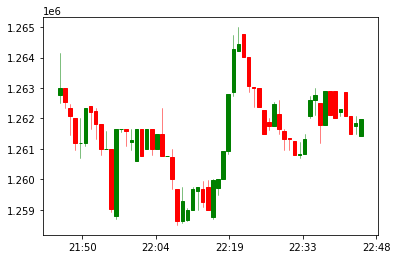

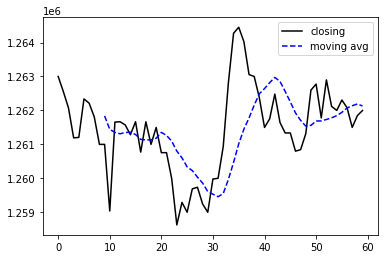

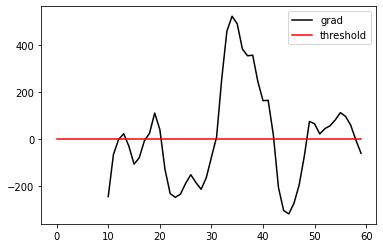

KeyboardInterrupt: 

In [3]:
api = Api()
while True:
    exec(api)
    time.sleep(60)